# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this data analysis work we will consider the TMDB movie data set. A set with approximately 10,000 films. The questions we want to answer cover which genres are most popular over the years; what kind of property can we associate with movies whose revenue is high and, finally, we want to know if movies *homepages* can influence popularity?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

* Through the result of the info function, executed below, it can be concluded that there are columns with null values. For example the columns: cast, homepages, and all columns have values below the total entry, 10866.
* In the next command you get the amount of null values. See: df.isnull (). Sum ().
* With the *duplicated* command from pandas, duplicate lines are checked, which should be discarded.

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
df.iloc[[8107,9389]]

id    imdb_id  popularity    budget    revenue        original_title  \
8107   8012  tt0113161     0.90178  30250000  115101622            Get Shorty   
9389  20978  tt0102465     0.80047         0          0  Mon pÃ¨re, ce hÃ©ros   

                                                   cast homepage  \
8107  John Travolta|Gene Hackman|Rene Russo|Danny De...      NaN   
9389  GÃ©rard Depardieu|Marie Gillain|Catherine Jaco...      NaN   

              director                                            tagline  \
8107  Barry Sonnenfeld  The mob is tough, but itâ€™s nothing like show...   
9389   GÃ©rard Lauzier                                                NaN   

          ...                                                overview runtime  \
8107      ...       A mobster travels to Hollywood to collect a de...     105   
9389      ...       Veronique, living with her divorced mother, is...     105   

                     genres  \
8107  Comedy|Thriller|Crime   
9389           Comedy|Drama   

                                   production_companies release_date  \
8107             Jersey Films|Metro-Goldwyn-Mayer (MGM)     10/20/95   
9389  Orly Films|DD Productions|Film Par Film|TF1 Fi...     10/23/91   

     vote_count  vote_average  release_year    budget_adj   revenue_adj  
8107        139           6.1          1995  4.328675e+07  1.647066e+08  
9389         11           5.1          1991  0.000000e+00  0.000000e+00  

[2 rows x 21 columns]

A small sample reveals that some information is missing and there are character display errors (Example: IDs 8107 and 9389). Some movies have the field *revenue* and *budget* zeroed. It is also possible to note that there are multivalued fields like *genres*, *keywords*, *cast*, where the various information is separated by *pipe*.

In [4]:
# verify any duplicate rows in dataset.
sum(df.duplicated())

1

Only one duplicate record was found.

In [5]:
df[df.revenue == 0].shape

(6016, 21)

From above results, there are **6016** records whose *revenue* is zero.

### Data Cleaning

In [6]:
df.dropna(subset=['genres'], inplace=True)
df.shape

(10843, 21)

Removed movie records with missing *genres* field.

In [7]:
df = df[df.revenue > 0 ]
df.shape

(4850, 21)

Here we remove records with *revenue* (zeroed).

In [8]:
# Check for totally empty rows
df.dropna(how='all').shape != df.shape

False

In [9]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

Duplicate record was removed


In [10]:
df.drop(['id','imdb_id','original_title',
         'cast','director','tagline', 'release_date',
         'keywords','overview', 'production_companies'], axis=1, inplace=True)

We have removed irrelevant columns for the questions we want to answer

In [11]:
#Through the result of the info function, it can be concluded that all columns do not contain null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 11 columns):
popularity      4849 non-null float64
budget          4849 non-null int64
revenue         4849 non-null int64
homepage        1665 non-null object
runtime         4849 non-null int64
genres          4849 non-null object
vote_count      4849 non-null int64
vote_average    4849 non-null float64
release_year    4849 non-null int64
budget_adj      4849 non-null float64
revenue_adj     4849 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 454.6+ KB


The column *homepage* is the only column with nulls. For the purpose of our study, let's assume that a null homepage indicates that the movie has no homepage.

In [12]:
df['homepage'] = df.homepage.notnull()

From now on, homepage is True if Movie has homepage. Otherwise, the value of homepage is False.

In [13]:
df.head(10)

popularity     budget     revenue  homepage  runtime  \
0   32.985763  150000000  1513528810      True      124   
1   28.419936  150000000   378436354      True      120   
2   13.112507  110000000   295238201      True      119   
3   11.173104  200000000  2068178225      True      136   
4    9.335014  190000000  1506249360      True      137   
5    9.110700  135000000   532950503      True      156   
6    8.654359  155000000   440603537      True      125   
7    7.667400  108000000   595380321      True      141   
8    7.404165   74000000  1156730962      True       91   
9    6.326804  175000000   853708609      True       94   

                                      genres  vote_count  vote_average  \
0  Action|Adventure|Science Fiction|Thriller        5562           6.5   
1  Action|Adventure|Science Fiction|Thriller        6185           7.1   
2         Adventure|Science Fiction|Thriller        2480           6.3   
3   Action|Adventure|Science Fiction|Fantasy        5292           7.5   
4                      Action|Crime|Thriller        2947           7.3   
5           Western|Drama|Adventure|Thriller        3929           7.2   
6  Science Fiction|Action|Thriller|Adventure        2598           5.8   
7            Drama|Adventure|Science Fiction        4572           7.6   
8          Family|Animation|Adventure|Comedy        2893           6.5   
9                    Comedy|Animation|Family        3935           8.0   

   release_year    budget_adj   revenue_adj  
0          2015  1.379999e+08  1.392446e+09  
1          2015  1.379999e+08  3.481613e+08  
2          2015  1.012000e+08  2.716190e+08  
3          2015  1.839999e+08  1.902723e+09  
4          2015  1.747999e+08  1.385749e+09  
5          2015  1.241999e+08  4.903142e+08  
6          2015  1.425999e+08  4.053551e+08  
7          2015  9.935996e+07  5.477497e+08  
8          2015  6.807997e+07  1.064192e+09  
9          2015  1.609999e+08  7.854116e+08

In [14]:
# convert budget and revenue columns to float
df['budget'] = df['budget'].astype('float')
df['revenue'] = df['revenue'].astype('float')
df.describe()


popularity        budget       revenue      runtime   vote_count  \
count  4849.000000  4.849000e+03  4.849000e+03  4849.000000  4849.000000   
mean      1.045202  2.956961e+07  8.923886e+07   107.968035   436.283151   
std       1.356752  4.051761e+07  1.620801e+08    21.113779   806.485754   
min       0.001117  0.000000e+00  2.000000e+00    15.000000    10.000000   
25%       0.387740  1.700000e+06  7.732325e+06    95.000000    46.000000   
50%       0.680581  1.500000e+07  3.185308e+07   104.000000   147.000000   
75%       1.210502  4.000000e+07  9.996575e+07   117.000000   435.000000   
max      32.985763  4.250000e+08  2.781506e+09   705.000000  9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count   4849.000000   4849.000000  4.849000e+03  4.849000e+03  
mean       6.149000   2000.919777  3.516208e+07  1.151009e+08  
std        0.798707     11.569650  4.376117e+07  1.988557e+08  
min        2.100000   1960.000000  0.000000e+00  2.370705e+00  
25%        5.600000   1994.000000  2.329409e+06  1.046585e+07  
50%        6.200000   2004.000000  2.032801e+07  4.395666e+07  
75%        6.700000   2010.000000  4.973516e+07  1.316482e+08  
max        8.400000   2015.000000  4.250000e+08  2.827124e+09

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 11 columns):
popularity      4849 non-null float64
budget          4849 non-null float64
revenue         4849 non-null float64
homepage        4849 non-null bool
runtime         4849 non-null int64
genres          4849 non-null object
vote_count      4849 non-null int64
vote_average    4849 non-null float64
release_year    4849 non-null int64
budget_adj      4849 non-null float64
revenue_adj     4849 non-null float64
dtypes: bool(1), float64(6), int64(3), object(1)
memory usage: 421.4+ KB


In [16]:
# Lets replace zeroed-budget by the mean
df.loc[df.budget == 0, 'budget'] = np.nan
df.fillna(df.mean())
df.describe()

popularity        budget       revenue      runtime   vote_count  \
count  4849.000000  3.854000e+03  4.849000e+03  4849.000000  4849.000000   
mean      1.045202  3.720370e+07  8.923886e+07   107.968035   436.283151   
std       1.356752  4.220822e+07  1.620801e+08    21.113779   806.485754   
min       0.001117  1.000000e+00  2.000000e+00    15.000000    10.000000   
25%       0.387740  1.000000e+07  7.732325e+06    95.000000    46.000000   
50%       0.680581  2.400000e+07  3.185308e+07   104.000000   147.000000   
75%       1.210502  5.000000e+07  9.996575e+07   117.000000   435.000000   
max      32.985763  4.250000e+08  2.781506e+09   705.000000  9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count   4849.000000   4849.000000  4.849000e+03  4.849000e+03  
mean       6.149000   2000.919777  3.516208e+07  1.151009e+08  
std        0.798707     11.569650  4.376117e+07  1.988557e+08  
min        2.100000   1960.000000  0.000000e+00  2.370705e+00  
25%        5.600000   1994.000000  2.329409e+06  1.046585e+07  
50%        6.200000   2004.000000  2.032801e+07  4.395666e+07  
75%        6.700000   2010.000000  4.973516e+07  1.316482e+08  
max        8.400000   2015.000000  4.250000e+08  2.827124e+09

In [17]:
# save clean data
df.to_csv('movie-data.csv', index=False)

We created a file with clean data: `movie-data.csv`

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: What genres are has more popularity through the years?

To addresses this question, we need realize some steps:
* get all genres without duplication;
* Create a new dataframe with column genres from previous step, so we can get movies by genres;
* Group movies year by five years;


In [18]:
gen_splitted = [gs.split('|') for gs in df.genres.unique()]
genres = set([g for gs in gen_splitted for g in gs])
print(genres)

{'Western', 'Action', 'War', 'Adventure', 'Animation', 'Foreign', 'History', 'Music', 'Comedy', 'Drama', 'Fantasy', 'Family', 'TV Movie', 'Romance', 'Documentary', 'Horror', 'Crime', 'Mystery', 'Science Fiction', 'Thriller'}


The set **genres** obtained contains all genres found. Now it is necessary to group the films in each genre.

In [19]:
def make_movieby_genre(df, genres):
    # make movie by genre
    movie_groups = []
    for g in genres:    
        movie_gen = df[df.genres.str.contains(g)][['popularity','budget', 'vote_count', 'vote_average',  'release_year', 'genres','revenue']]
        movie_gen['genres_1'] = np.repeat(g, movie_gen.shape[0])
        movie_groups.append(movie_gen)
    return movie_groups
movie_groups = make_movieby_genre(df, genres)
movies = pd.concat(movie_groups)
movies.head(2)

popularity       budget  vote_count  vote_average  release_year  \
5       9.1107  135000000.0        3929           7.2          2015   
15      5.8984   44000000.0        2389           7.4          2015   

                              genres      revenue genres_1  
5   Western|Drama|Adventure|Thriller  532950503.0  Western  
15       Crime|Drama|Mystery|Western  155760117.0  Western

To facilitate analysis we will group the films every 5 years and check the average of the popularity:

In [20]:
# set lustrum field (period of five years)

period = 5
movies['lustrum'] = (movies.release_year // period)*period
movies.head(4)

popularity       budget  vote_count  vote_average  release_year  \
5      9.110700  135000000.0        3929           7.2          2015   
15     5.898400   44000000.0        2389           7.4          2015   
125    1.329702          NaN         229           6.6          2015   
794    0.870104   16000000.0         150           6.2          2014   

                               genres      revenue genres_1  lustrum  
5    Western|Drama|Adventure|Thriller  532950503.0  Western     2015  
15        Crime|Drama|Mystery|Western  155760117.0  Western     2015  
125          Romance|Thriller|Western     229094.0  Western     2015  
794                     Western|Drama    2429989.0  Western     2010

In [21]:
# average popularity by lustrum
pivot_table = pd.pivot_table(movies, values='popularity', index=['lustrum'], columns=['genres_1'], aggfunc='mean')
pivot_table

genres_1    Action  Adventure  Animation    Comedy     Crime  Documentary  \
lustrum                                                                     
1960      1.500367   1.827838   2.631987  0.938070  0.741079          NaN   
1965      0.980355   1.172310   2.550704  0.917042  0.752185          NaN   
1970      0.587404   0.798782   2.104724  0.607834  0.959113     0.029670   
1975      1.260937   1.279633   0.654268  0.635279  0.724527     0.064029   
1980      1.031243   1.170096   0.538428  0.704059  0.665240     0.351799   
1985      0.856970   1.012299   1.335978  0.671599  0.571668     0.168545   
1990      0.807403   0.947222   1.295850  0.702961  0.983848     0.233812   
1995      1.060483   1.144319   1.458253  0.724390  0.972304     0.248277   
2000      1.239533   1.552073   1.445014  0.874149  0.915177     0.256732   
2005      1.289423   1.444910   1.488849  0.863229  0.947314     0.239862   
2010      2.022848   2.610498   1.694381  1.116259  1.271424     0.254402   
2015      4.857300   5.248548   2.352485  1.776127  2.786263     0.313334   

genres_1     Drama    Family   Fantasy   Foreign   History    Horror  \
lustrum                                                                
1960      0.796239  0.999265  1.987819       NaN  0.753349  1.034079   
1965      0.657636  1.184698  0.241283       NaN  0.690924  0.724527   
1970      0.812207  1.755999  1.407273       NaN  0.474831  1.458410   
1975      0.699907  0.588169  0.719617       NaN  0.797715  0.980788   
1980      0.603874  0.978349  0.735961  0.148192  0.629624  0.613330   
1985      0.593510  0.876790  0.733901  0.077948  0.550389  0.505978   
1990      0.682160  0.947814  0.974657  0.289664  0.754725  0.566747   
1995      0.819076  1.044532  1.168953  0.195606  0.785814  0.820874   
2000      0.823599  1.405372  2.309673  0.222396  0.915827  0.857811   
2005      0.799951  1.320312  1.640023  0.175400  0.772870  0.751797   
2010      1.082991  1.598027  2.181113  0.129201  1.199675  0.892337   
2015      1.758922  2.790577  2.946939       NaN  2.027768  1.251045   

genres_1     Music   Mystery   Romance  Science Fiction  TV Movie  Thriller  \
lustrum                                                                       
1960      0.931615  0.573544  0.710853              NaN       NaN  1.955844   
1965      0.600345  1.203608  0.692549         1.178658       NaN  0.981700   
1970      0.420142  0.768832  0.410233         1.111263       NaN  0.802186   
1975      0.629629  0.547183  0.609931         1.550173       NaN  0.940305   
1980      0.511719  0.464588  0.542461         1.145325       NaN  0.733800   
1985      0.498092  0.468399  0.585325         0.871193       NaN  0.676806   
1990      0.711961  0.658787  0.705771         0.873951       NaN  0.797536   
1995      0.556169  1.015024  0.706677         1.214455  0.273628  0.992004   
2000      0.689354  0.934911  0.882684         1.328103       NaN  0.971859   
2005      0.810135  1.027179  0.864017         1.406029       NaN  1.067799   
2010      0.879189  1.595603  0.984984         2.677070       NaN  1.419032   
2015      1.176951  2.301307  1.735462         6.168163       NaN  3.259221   

genres_1       War   Western  
lustrum                       
1960      1.199529  0.769762  
1965      0.603066  0.573502  
1970      0.417715  0.395489  
1975      1.156599  0.303817  
1980      0.688868  0.243985  
1985      0.840255  0.619817  
1990      0.881771  0.794337  
1995      0.872232  0.710569  
2000      1.177404  0.828279  
2005      1.097444  0.784792  
2010      1.702861  1.323581  
2015      1.765139  5.446267

It is notable that the *Documentary*, *Foreign*, *Science Fiction* and *TV Movie* genres have incomplete data and therefore we can remove these columns. We consider the NA registers from genres *Documentary* and *Scince Fiction* negligible and we'll keep them filled with zeros.

In [22]:
# Removes columns with empty values
pivot_table.drop(columns=['Foreign', 'TV Movie'], inplace=True)
movies.drop(movies.loc[(movies.genres_1  == 'Foreign') |  (movies.genres_1  == 'TV Movie')].index, inplace=True)
# Replaces NA values with Zeros.
pivot_table.fillna(0, inplace=True)
pivot_table


genres_1    Action  Adventure  Animation    Comedy     Crime  Documentary  \
lustrum                                                                     
1960      1.500367   1.827838   2.631987  0.938070  0.741079     0.000000   
1965      0.980355   1.172310   2.550704  0.917042  0.752185     0.000000   
1970      0.587404   0.798782   2.104724  0.607834  0.959113     0.029670   
1975      1.260937   1.279633   0.654268  0.635279  0.724527     0.064029   
1980      1.031243   1.170096   0.538428  0.704059  0.665240     0.351799   
1985      0.856970   1.012299   1.335978  0.671599  0.571668     0.168545   
1990      0.807403   0.947222   1.295850  0.702961  0.983848     0.233812   
1995      1.060483   1.144319   1.458253  0.724390  0.972304     0.248277   
2000      1.239533   1.552073   1.445014  0.874149  0.915177     0.256732   
2005      1.289423   1.444910   1.488849  0.863229  0.947314     0.239862   
2010      2.022848   2.610498   1.694381  1.116259  1.271424     0.254402   
2015      4.857300   5.248548   2.352485  1.776127  2.786263     0.313334   

genres_1     Drama    Family   Fantasy   History    Horror     Music  \
lustrum                                                                
1960      0.796239  0.999265  1.987819  0.753349  1.034079  0.931615   
1965      0.657636  1.184698  0.241283  0.690924  0.724527  0.600345   
1970      0.812207  1.755999  1.407273  0.474831  1.458410  0.420142   
1975      0.699907  0.588169  0.719617  0.797715  0.980788  0.629629   
1980      0.603874  0.978349  0.735961  0.629624  0.613330  0.511719   
1985      0.593510  0.876790  0.733901  0.550389  0.505978  0.498092   
1990      0.682160  0.947814  0.974657  0.754725  0.566747  0.711961   
1995      0.819076  1.044532  1.168953  0.785814  0.820874  0.556169   
2000      0.823599  1.405372  2.309673  0.915827  0.857811  0.689354   
2005      0.799951  1.320312  1.640023  0.772870  0.751797  0.810135   
2010      1.082991  1.598027  2.181113  1.199675  0.892337  0.879189   
2015      1.758922  2.790577  2.946939  2.027768  1.251045  1.176951   

genres_1   Mystery   Romance  Science Fiction  Thriller       War   Western  
lustrum                                                                      
1960      0.573544  0.710853         0.000000  1.955844  1.199529  0.769762  
1965      1.203608  0.692549         1.178658  0.981700  0.603066  0.573502  
1970      0.768832  0.410233         1.111263  0.802186  0.417715  0.395489  
1975      0.547183  0.609931         1.550173  0.940305  1.156599  0.303817  
1980      0.464588  0.542461         1.145325  0.733800  0.688868  0.243985  
1985      0.468399  0.585325         0.871193  0.676806  0.840255  0.619817  
1990      0.658787  0.705771         0.873951  0.797536  0.881771  0.794337  
1995      1.015024  0.706677         1.214455  0.992004  0.872232  0.710569  
2000      0.934911  0.882684         1.328103  0.971859  1.177404  0.828279  
2005      1.027179  0.864017         1.406029  1.067799  1.097444  0.784792  
2010      1.595603  0.984984         2.677070  1.419032  1.702861  1.323581  
2015      2.301307  1.735462         6.168163  3.259221  1.765139  5.446267

In [23]:
pivot_table.describe()

genres_1     Action  Adventure  Animation     Comedy      Crime  Documentary  \
count     12.000000  12.000000  12.000000  12.000000  12.000000    12.000000   
mean       1.457855   1.684044   1.629244   0.877583   1.024178     0.180038   
std        1.132246   1.221697   0.676118   0.320193   0.585424     0.124622   
min        0.587404   0.798782   0.538428   0.607834   0.571668     0.000000   
25%        0.949509   1.111314   1.325946   0.695120   0.736941     0.055439   
50%        1.150008   1.225972   1.473551   0.793809   0.931245     0.236837   
75%        1.342159   1.621015   2.166664   0.922299   0.975190     0.254984   
max        4.857300   5.248548   2.631987   1.776127   2.786263     0.351799   

genres_1      Drama     Family    Fantasy    History     Horror      Music  \
count     12.000000  12.000000  12.000000  12.000000  12.000000  12.000000   
mean       0.844173   1.290825   1.420601   0.862793   0.871477   0.701275   
std        0.316596   0.572982   0.806409   0.409810   0.279470   0.216524   
min        0.593510   0.588169   0.241283   0.474831   0.505978   0.420142   
25%        0.676029   0.970715   0.735446   0.675599   0.696728   0.545056   
50%        0.798095   1.114615   1.288113   0.763797   0.839342   0.659491   
75%        0.820207   1.453536   2.036143   0.827243   0.994111   0.827399   
max        1.758922   2.790577   2.946939   2.027768   1.458410   1.176951   

genres_1    Mystery    Romance  Science Fiction   Thriller        War  \
count     12.000000  12.000000        12.000000  12.000000  12.000000   
mean       0.963247   0.785912         1.627032   1.216508   1.033574   
std        0.539750   0.337827         1.552814   0.732094   0.406813   
min        0.464588   0.410233         0.000000   0.676806   0.417715   
25%        0.566954   0.603779         1.051935   0.801024   0.802408   
50%        0.851872   0.706224         1.196556   0.976780   0.989607   
75%        1.071286   0.868684         1.442065   1.155608   1.182936   
max        2.301307   1.735462         6.168163   3.259221   1.765139   

genres_1    Western  
count     12.000000  
mean       1.066183  
std        1.408559  
min        0.243985  
25%        0.528999  
50%        0.740165  
75%        0.802823  
max        5.446267

In [24]:
df.describe()

popularity        budget       revenue      runtime   vote_count  \
count  4849.000000  3.854000e+03  4.849000e+03  4849.000000  4849.000000   
mean      1.045202  3.720370e+07  8.923886e+07   107.968035   436.283151   
std       1.356752  4.220822e+07  1.620801e+08    21.113779   806.485754   
min       0.001117  1.000000e+00  2.000000e+00    15.000000    10.000000   
25%       0.387740  1.000000e+07  7.732325e+06    95.000000    46.000000   
50%       0.680581  2.400000e+07  3.185308e+07   104.000000   147.000000   
75%       1.210502  5.000000e+07  9.996575e+07   117.000000   435.000000   
max      32.985763  4.250000e+08  2.781506e+09   705.000000  9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count   4849.000000   4849.000000  4.849000e+03  4.849000e+03  
mean       6.149000   2000.919777  3.516208e+07  1.151009e+08  
std        0.798707     11.569650  4.376117e+07  1.988557e+08  
min        2.100000   1960.000000  0.000000e+00  2.370705e+00  
25%        5.600000   1994.000000  2.329409e+06  1.046585e+07  
50%        6.200000   2004.000000  2.032801e+07  4.395666e+07  
75%        6.700000   2010.000000  4.973516e+07  1.316482e+08  
max        8.400000   2015.000000  4.250000e+08  2.827124e+09

In [25]:
pivot_table.plot(kind='bar',title="Popularity over Lustrum",subplots=True,layout=(10,3),figsize=(15,25));


From the graph above and considering that the most popular have an average polularity close to or greater than 2, we can conclude that these are the most popular genres over the years:
* Adventure, 
* Action, 
* Fantasy, 
* Family, 
* Science Fiction,
* Animation


In [26]:
mean_movies = movies.groupby('genres_1').popularity.mean().sort_values(ascending=False)

plot_movies = mean_movies.plot(figsize=(10,5), kind='bar');
plot_movies.set_title('Genres vs Popularity')
plot_movies.set_xlabel('Genres')
plot_movies.set_ylabel('Average Popularity');

The plot above shows average genre popularity, in descending order. 

### Research Question 2 : What kinds of properties are associated with movies that have high revenues?


In [27]:
# get the cleaned file from previous investigation.

df = pd.read_csv('movie-data.csv')

In [28]:
high_revenue = df[df.revenue >= 5e+8]

In this analysis, we will create the column *high_revenue* and establish a floor of half a billion for high-revenue films.

In [29]:
high_revenue.describe()

popularity        budget       revenue     runtime   vote_count  \
count  143.000000  1.430000e+02  1.430000e+02  143.000000   143.000000   
mean     4.630567  1.429626e+08  7.951605e+08  125.531469  3166.615385   
std      3.937965  6.574273e+07  3.098171e+08   24.970350  1774.860093   
min      0.436803  1.050000e+07  5.001884e+08   86.000000    48.000000   
25%      2.574915  9.500000e+07  5.917672e+08  103.000000  1802.500000   
50%      3.655536  1.450000e+08  7.163927e+08  127.000000  2952.000000   
75%      5.588386  1.875000e+08  8.887792e+08  142.500000  3980.000000   
max     32.985763  3.800000e+08  2.781506e+09  201.000000  9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count    143.000000    143.000000  1.430000e+02  1.430000e+02  
mean       6.855944   2007.503497  1.469398e+08  8.641998e+08  
std        0.652581      7.397063  6.168241e+07  3.842802e+08  
min        5.300000   1977.000000  2.372625e+07  4.607191e+08  
25%        6.400000   2004.500000  1.064214e+08  6.209219e+08  
50%        6.800000   2009.000000  1.497653e+08  7.526009e+08  
75%        7.400000   2013.000000  1.872067e+08  9.988429e+08  
max        8.100000   2015.000000  3.683713e+08  2.827124e+09

Based on the above results it turns out that *popularity*, *vote_count*, *vote_average* are important factors in a movie's revenue. In the case of popularity, 75% of the films in this category have indices greater than *2.57*. The attributes vote_count and voute_average follow the same analogy; The budget also seems to point in this direction.


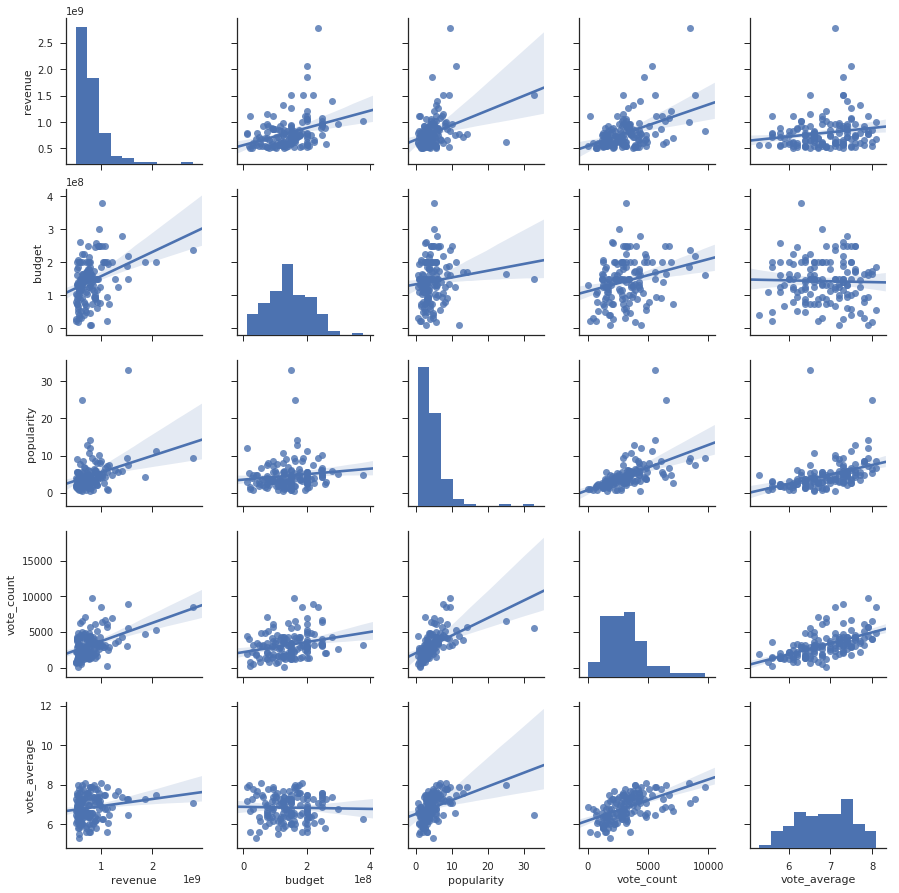

In [30]:
sns.set(style="ticks")

sns.pairplot(high_revenue[['revenue', 'budget','popularity','vote_count','vote_average']], kind='reg');


The first column of the scatterplot matrix shows the relationship of revenue with *budget*, *popularity*, *vote_count* and *vote_average*. We draw a linear regression curve that demonstrate positive influence of *budget*, *vote_count* and *popularity* in *revenue*.




In [31]:

high_revenue_groups = pd.concat(make_movieby_genre(high_revenue, genres))

In [32]:
# Properties x Revenue

colunas = ['popularity','budget','revenue','genres_1']
high_revenue_groups[colunas].sort_values('revenue',ascending=False).head(15)

popularity       budget       revenue         genres_1
468     9.432768  237000000.0  2.781506e+09  Science Fiction
468     9.432768  237000000.0  2.781506e+09        Adventure
468     9.432768  237000000.0  2.781506e+09           Action
468     9.432768  237000000.0  2.781506e+09          Fantasy
3      11.173104  200000000.0  2.068178e+09  Science Fiction
3      11.173104  200000000.0  2.068178e+09           Action
3      11.173104  200000000.0  2.068178e+09        Adventure
3      11.173104  200000000.0  2.068178e+09          Fantasy
2159    4.355219  200000000.0  1.845034e+09          Romance
2159    4.355219  200000000.0  1.845034e+09         Thriller
2159    4.355219  200000000.0  1.845034e+09            Drama
1804    7.637767  220000000.0  1.519558e+09  Science Fiction
1804    7.637767  220000000.0  1.519558e+09        Adventure
1804    7.637767  220000000.0  1.519558e+09           Action
0      32.985763  150000000.0  1.513529e+09  Science Fiction

The table above shows the movies in descending order of revenue. At the top, there are films belonging to the categories *Action*, *Adventure*, *Family*, *Fantasy* corresponding to the most popular genres raised in Question 01. The following table collaborates with the hypothesis. Therefore, according to the findings, the columns: 'popularity', 'budget', 'revenue', 'genres', are properties associated with high revenues.

In [38]:
# Average popularity per quinquennium
pivot_table = pd.pivot_table(movies, values='revenue', index=['lustrum'], columns=['genres_1'], aggfunc='mean')

pivot_table

genres_1        Action     Adventure     Animation        Comedy  \
lustrum                                                            
1960      4.683375e+07  7.089820e+07  2.158800e+08  2.932763e+07   
1965      4.946914e+07  5.497285e+07  2.058436e+08  4.062641e+07   
1970      4.753188e+07  4.775201e+07  4.386586e+07  5.109957e+07   
1975      8.240798e+07  9.607367e+07  2.860026e+07  5.038993e+07   
1980      7.895857e+07  1.022390e+08  1.311369e+07  5.159473e+07   
1985      6.089890e+07  7.644063e+07  1.058338e+08  5.374784e+07   
1990      8.054643e+07  1.117611e+08  1.180052e+08  6.940624e+07   
1995      1.288235e+08  1.480743e+08  1.562400e+08  7.430431e+07   
2000      1.444770e+08  2.069790e+08  1.876692e+08  9.179982e+07   
2005      1.489121e+08  2.144650e+08  2.299689e+08  8.850785e+07   
2010      1.959004e+08  3.353116e+08  3.144463e+08  9.170186e+07   
2015      3.147019e+08  3.494016e+08  2.971754e+08  1.129294e+08   

genres_1         Crime   Documentary         Drama        Family  \
lustrum                                                            
1960      1.740660e+07           NaN  2.381349e+07  6.869212e+07   
1965      3.614536e+07           NaN  4.109169e+07  9.871447e+07   
1970      4.260995e+07  3.000000e+04  5.459715e+07  2.568293e+07   
1975      3.204707e+07  3.219520e+05  5.040916e+07  3.368911e+07   
1980      4.126023e+07  3.351397e+06  3.354037e+07  1.014992e+08   
1985      4.589433e+07  5.892440e+05  5.125692e+07  7.095053e+07   
1990      7.510760e+07  3.696239e+06  6.722832e+07  1.056445e+08   
1995      8.993554e+07  4.637118e+07  8.043353e+07  1.145810e+08   
2000      9.015082e+07  1.770451e+07  7.156343e+07  1.916073e+08   
2005      6.651912e+07  1.395901e+07  6.159222e+07  1.872653e+08   
2010      7.274398e+07  6.943891e+06  5.674511e+07  2.835713e+08   
2015      1.673449e+08  3.990066e+06  5.976447e+07  2.999046e+08   

genres_1       Fantasy       History        Horror         Music  \
lustrum                                                            
1960      1.022727e+08  3.545833e+07  1.166338e+07  4.538602e+07   
1965      9.000000e+06  4.510296e+07  3.339543e+07  5.975357e+07   
1970      7.500000e+06  4.058707e+07  2.360826e+08  1.180216e+07   
1975      4.894012e+07  3.755676e+07  7.180185e+07  9.081428e+07   
1980      6.612766e+07  3.145645e+07  2.531238e+07  3.793916e+07   
1985      4.437724e+07  2.818941e+07  2.089634e+07  3.239344e+07   
1990      8.634579e+07  7.704995e+07  3.149003e+07  8.522556e+07   
1995      1.162248e+08  1.088885e+08  5.995902e+07  4.882346e+07   
2000      2.703515e+08  1.145744e+08  8.462852e+07  5.688990e+07   
2005      2.412746e+08  6.714790e+07  5.531036e+07  8.632148e+07   
2010      3.118814e+08  6.878685e+07  5.152144e+07  6.133370e+07   
2015      2.704446e+08  4.511778e+07  4.404189e+07  5.872377e+07   

genres_1       Mystery       Romance  Science Fiction      Thriller  \
lustrum                                                               
1960      7.241529e+06  2.535307e+07              NaN  4.583905e+07   
1965      3.277724e+07  6.085732e+07     2.573137e+07  5.394322e+07   
1970      1.120480e+07  3.121028e+07     2.995373e+07  6.781757e+07   
1975      3.582741e+07  5.664024e+07     1.110696e+08  6.650853e+07   
1980      1.395828e+07  4.277974e+07     8.167620e+07  3.333443e+07   
1985      2.462573e+07  5.445602e+07     4.206704e+07  4.239041e+07   
1990      9.887268e+07  8.046117e+07     8.646034e+07  8.350586e+07   
1995      1.101062e+08  7.980944e+07     1.206967e+08  1.066334e+08   
2000      8.201447e+07  7.447894e+07     1.495019e+08  9.669299e+07   
2005      8.518110e+07  7.659785e+07     1.525810e+08  8.719262e+07   
2010      9.744293e+07  6.713584e+07     2.401340e+08  8.724381e+07   
2015      4.825926e+07  6.839739e+07     3.434665e+08  1.290778e+08   

genres_1           War       Western  
lustrum                               
1960      2.833507e+07  1.680125e+07  
1965      4.180438e+07  2.266

### Research Question 3: Movies that have homepages are usually more popular?

In [34]:
popPage = ['popularity', 'homepage']
df[popPage].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4849 entries, 0 to 4848
Data columns (total 2 columns):
popularity    4849 non-null float64
homepage      4849 non-null bool
dtypes: bool(1), float64(1)
memory usage: 42.7 KB


In the above summary we see that only 34% of the movies have homepage. We can now compare the average popularity of movies with homepage and movies without homepage. For this we can separate them into two groups.

In [35]:
noHomepage = df[df.homepage == False]
withHomepage = df[df.homepage == True]
print('With Homepage:{}  Without Homepage: {}'.format(withHomepage.shape[0],noHomepage.shape[0]))

With Homepage:1665  Without Homepage: 3184


In [36]:
noHomepage.popularity.describe()

count    3184.000000
mean        0.801974
std         0.744942
min         0.006115
25%         0.349694
50%         0.592299
75%         0.993741
max         8.093754
Name: popularity, dtype: float64

Over 75% of movies have popularity below 0.99 and have no homepage.

In [37]:
withHomepage.popularity.describe()

count    1665.000000
mean        1.510329
std         1.992947
min         0.001117
25%         0.499301
50%         0.939705
75%         1.798132
max        32.985763
Name: popularity, dtype: float64

It is noted that 75% of the movies have popularity below 1.79, despite having homepage. Based on the two results, we can conclude that having a homepage does not guarantee a higher popularity rate.

## Conclusions

In this work, we mainly study the popularity, revenues and
attributes that influence these values, such as budget, gender, votes and the presence of homepage.

It was concluded that the most popular genres
over the years they are, above all, **Adventure**, **Action**, **Family**, **Science Fiction** and **Fantasy**. We also conclude that, overall, the higher the popularity and budget, the higher the movie revenue. The data suggest that the most popular genres are also present in high-revenue films. Finally, we tested the hypothesis that a homepage for film could positively influence the popularity, but according to the available data, no evidence was found to support this conjecture.


This paper does not respond definitively on the issues raised, as there are many data missing (NA) and other aspects could not be addressed. For example, how much of the budget was allocated for the publicity of the film and what is the impact of this investment on the popularity and revenue of a movie? In addition to missing data, we encountered character encoding problems and fill-in-fill problems, for example, some budgets are populated with values well below average. He also missed more experimentation with votes_count and votes_averange to try to understand the popularity and revenue of the movies.